# 实验一：单变量线性回归

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib

Using matplotlib backend: Qt5Agg


## 画直径X和价格Y的散点图

In [41]:
def initPlot():
    plt.figure(figsize=(20,10))        
    plt.title('180512206-李环宇-Pizza Price vs Diameter')  
    plt.rcParams['font.sans-serif'] = ['SimHei'] # 正常显示中文
    plt.rcParams['axes.unicode_minus'] = False # 正常显示负号
    plt.xlabel('Diameter')  
    plt.ylabel('Price')   
    plt.axis([0, 25, 0, 25])        
    plt.grid(True)
    return plt

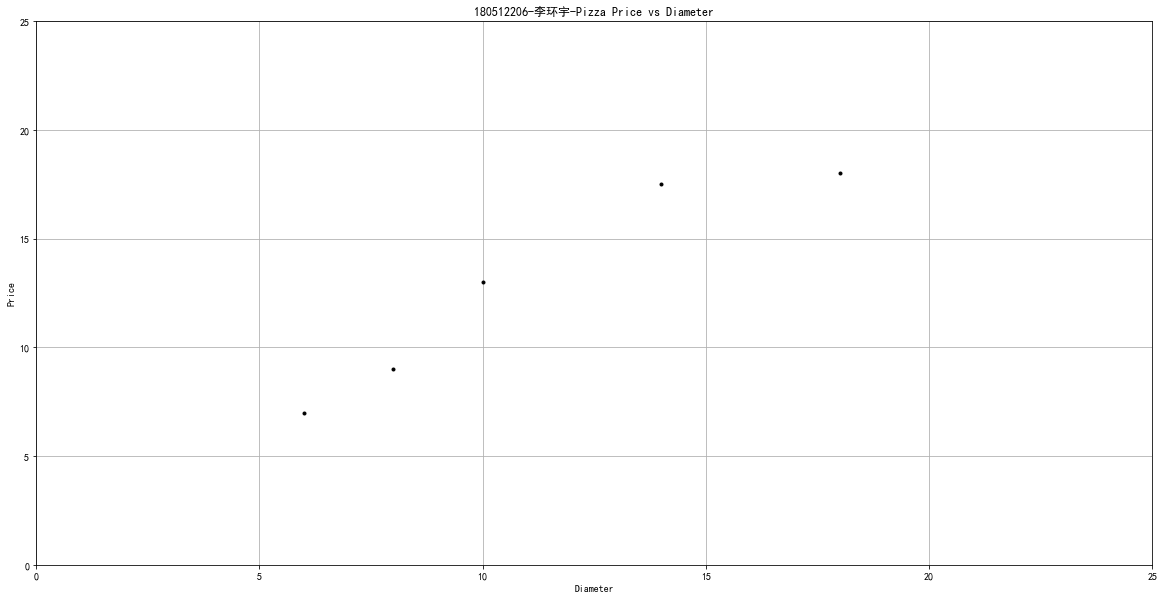

In [48]:
plt = initPlot()    
plt.plot(x_train, y_train, 'k.')         #k是黑色，.是以点作为图上显示
plt.savefig('output/实验1.1.png',dpi=80)

In [104]:
plt.show()

1.价格𝑦随着直径𝑥的变化，大致呈现线性变化；
2.如果根据现有的训练数据能够拟合出一条直线，使之与这些训练数据的各点都比较接近，那么根据该直线，就可以计算出在任意直径披萨的价格。

## 训练模型

### 准备训练数据

In [5]:
x_train = np.array([6,8,10,14,18])[:,np.newaxis]
y_train = np.array([7,9,13,17.5,18])

### 构建线性模型

In [7]:
lmodel = LinearRegression()

### 求线性方程的截距和斜率

In [8]:
# 根据训练数据拟合出直线,以得到假设函数
hypothesis = lmodel.fit(x_train, y_train)

In [9]:
print("截距=", hypothesis.intercept_)  
print("斜率=", hypothesis.coef_)        

截距= 1.965517241379315
斜率= [0.9762931]


### 画拟合直线

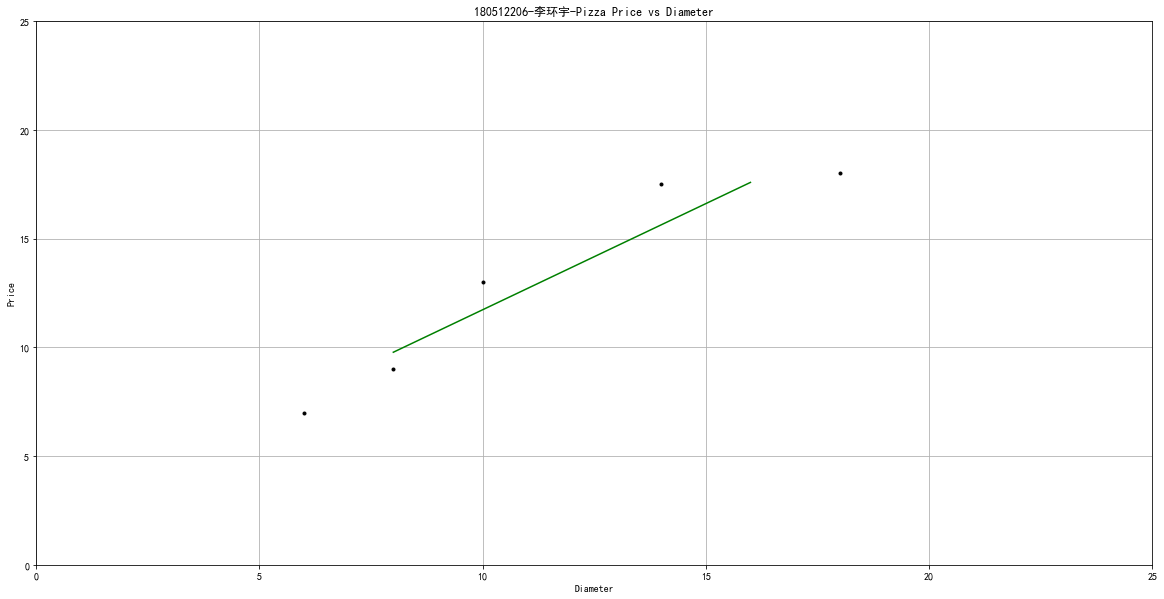

In [47]:
plt = initPlot()
plt.plot(x_train, y_train, 'k.')
plt.plot(x_predictDiam, y_predictPrim, 'g-')
plt.savefig('output/实验1.2.png',dpi=80)

## 模型预测

### 预测测12英寸披萨的价格

In [17]:
predictPrice = lmodel.predict([[12]])

In [18]:
print('twelve inch pizza price %f' % predictPrice)

twelve inch pizza price 13.681034


### 批量预测多个直径

In [19]:
x_predictDiam = np.array([8,9,11,12,16])[:,np.newaxis]
y_predictPrim = lmodel.predict(x_predictDiam)

In [20]:
x_predictDiam

array([[ 8],
       [ 9],
       [11],
       [12],
       [16]])

In [15]:
y_predictPrim

array([ 9.77586207, 10.75215517, 12.70474138, 13.68103448, 17.5862069 ])

## 评价分析模型

### 准备测试数据

In [21]:
x_test = np.array([8,9,11,12,16])[:,np.newaxis]
y_test = np.array([8.5,11,12,15,18])

In [22]:
hpyTrain = lmodel.predict(x_train)
hpyTest = lmodel.predict(x_test)

###  手动计算训练数据集残差

In [24]:
ssResTrain = sum((hpyTrain - y_train)**2)                

In [25]:
ssResTrain

8.747844827586203

### Python计算的训练数据集残差

In [26]:
lmodel._residues

8.747844827586201

### 手动计算测试数据集残差

In [27]:
ssResTest = sum((hpyTest - y_test)**2)

### 手动计算测试数据集y值偏差平方和

In [28]:
ssTotTest = sum((y_test - np.mean(y_test))**2)

### 手动计算R方

In [29]:
Rsquare = 1 - ssResTest / ssTotTest

In [30]:
Rsquare

0.9244131686820731

### Python计算的训练数据集的R方

In [31]:
lmodel.score(x_test, y_test)

0.9244131686820731

### corrcoef函数计算各行元素之间相关性

In [32]:
print(np.corrcoef(x_train.T, y_train.T))            # 计算训练数据的相关性

[[1.         0.95394004]
 [0.95394004 1.        ]]


In [33]:
print(np.corrcoef(x_test.T, y_test.T))              # 计算测试数据的相关性

[[1.        0.9725666]
 [0.9725666 1.       ]]


### 画图

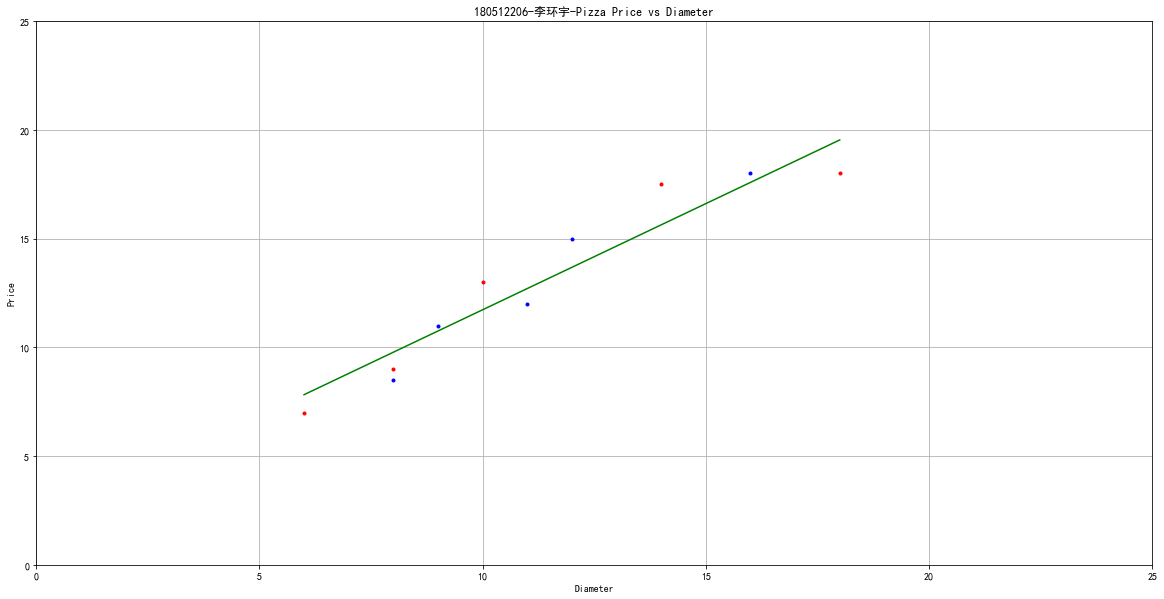

In [46]:
plt = initPlot()
plt.plot(x_train, y_train, 'r.')          # 训练点数据(红色)
plt.plot(x_test, y_test, 'b.')            # 测试点数据(蓝色)
plt.plot(x_train, hpyTrain, 'g-')        # 假设函数直线(绿色)
plt.savefig('output/实验1.3.png',dpi=80)
plt.show()

### 模型准确率

In [35]:
print('model score = ', lmodel.score(x_test, y_test))

model score =  0.9244131686820731


## 多变量线性回归

https://blog.csdn.net/IT_charge/article/details/105686746

# 实验二 使用决策树和随机森林对数据分类

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split

## 读入数据

In [2]:
data = pd.read_csv("data/income_classification.csv")

In [129]:
type(data)

pandas.core.frame.DataFrame

### 显示数据维度

In [130]:
data.shape

(32561, 15)

### 显示前5行数据

In [131]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### 查看个变量样本数

In [132]:
data.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

### 部分变量描述统计

In [133]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### 按职业分组、计数并排序

In [134]:
data.groupby('occupation').size().sort_values(ascending=False)

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
dtype: int64

### 按国籍分组、计数并排序

In [135]:
data.groupby('native-country').size().sort_values(ascending=False)

native-country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

### 绘制教育年限直方图

array([[<AxesSubplot:title={'center':'education-num'}>]], dtype=object)

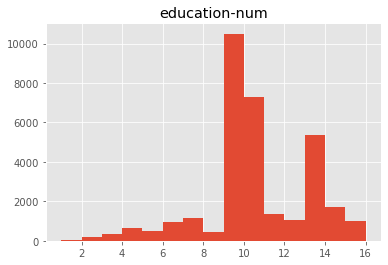

In [3]:
plt.style.use('ggplot')
data.hist(column='education-num', bins=15);
plt.show()

### 以年龄为横坐标、周平均工作时长为纵坐标绘制散点图

<AxesSubplot:xlabel='age', ylabel='hours-per-week'>

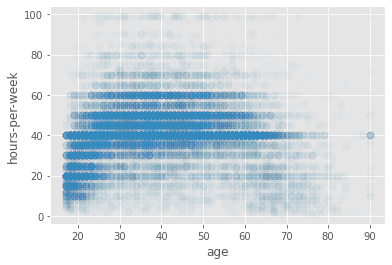

In [4]:
data.plot(x='age', y='hours-per-week', kind='scatter',alpha=0.02, s=50)

### 将样本数据按照收入水平分组，并计算各组样本数

In [140]:
data.groupby('income')['income'].count()

income
<=50K    24720
>50K      7841
Name: income, dtype: int64

### data[‘income’] == ’ >50K’中是取值为TRUE（1）或FALSE（0）的布尔值,此处计算其均值，即收入水平大于50K的人数占比

In [141]:
np.mean(data['income'] == '>50K')

0.2408095574460244

### pandas中Series.unique()返回序列（series）中唯一值的数组（array），目的是检查是否存在缺失值或异常值：

In [142]:
data['income'].unique()
data = data.dropna() # pandas.DataFrame.dropna 可以删除数据框中的缺失值
data['income'].unique() # 如果变量income中含有缺失值，可在此步验证是否已经将缺失值删除

array(['<=50K', '>50K'], dtype=object)

array(['<=50K', '>50K'], dtype=object)

### 将收入水平不超过50K的数据保存到数据框low_income，高于50K的数据保存到数据框high_income:

In [6]:
low_income = data[data['income'] == '<=50K']
high_income = data[data['income'] == '>50K']

### 绘制、对比不同收入水平的年龄分布情况

(array([   0.,  945., 2932., 3142., 3576., 2625., 2284., 2062., 1754.,
        1677., 1038.,  904.,  721.,  457.,  325.,  142.,   68.,   28.,
          40.]),
 array([10.        , 14.21052632, 18.42105263, 22.63157895, 26.84210526,
        31.05263158, 35.26315789, 39.47368421, 43.68421053, 47.89473684,
        52.10526316, 56.31578947, 60.52631579, 64.73684211, 68.94736842,
        73.15789474, 77.36842105, 81.57894737, 85.78947368, 90.        ]),
 <BarContainer object of 19 artists>)

(array([   0.,    0.,   18.,  159.,  688.,  840., 1115., 1090., 1149.,
        1118.,  626.,  487.,  275.,  142.,   75.,   29.,   19.,    3.,
           8.]),
 array([10.        , 14.21052632, 18.42105263, 22.63157895, 26.84210526,
        31.05263158, 35.26315789, 39.47368421, 43.68421053, 47.89473684,
        52.10526316, 56.31578947, 60.52631579, 64.73684211, 68.94736842,
        73.15789474, 77.36842105, 81.57894737, 85.78947368, 90.        ]),
 <BarContainer object of 19 artists>)

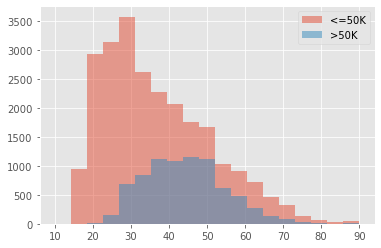

In [7]:
bins = np.linspace(10, 90, 20)
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, label='<=50K')
plt.hist(high_income['age'].values, bins=bins, alpha=0.5, label='>50K')
plt.legend(loc='best'); # 添加变量标注说明，参数为位置设置
plt.show()

## 对连续变量年龄进行离散化，并显示前5行数据离散化后的结果

In [146]:
age_bins = [20,30,40,50,60,70]

In [148]:
data['age'] = pd.cut(data['age'],6,labels=age_bins)

In [149]:
data['age']

0        30
1        40
2        30
3        40
4        20
         ..
32556    20
32557    30
32558    50
32559    20
32560    40
Name: age, Length: 32561, dtype: category
Categories (6, int64): [20 < 30 < 40 < 50 < 60 < 70]

In [150]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,30,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,40,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,30,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,40,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,20,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 对属性是字符串的任意特征进行数字化处理

In [11]:
encoder = LabelEncoder()

In [12]:
str_col = data.select_dtypes(include = object,exclude = int)

In [13]:
for i in str_col:
    data[i] = encoder.fit_transform(data[i])

In [14]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


## 拆分训练数据和测试数据比例7:3

In [ ]:
# 将特征划分到 X 中，标签划分到 Y 中

In [15]:
x = data.iloc[:,:-1]

In [16]:
y = data.iloc[:,-1]

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

## CART决策树分类

In [18]:
clf_cart = tree.DecisionTreeClassifier(criterion = 'entropy') # CART算法，使用entropy作为标准；默认是是用gini作为标准
clf_cart.fit(x_train, y_train)
accuracy_cart = clf_cart.score(x_test, y_test)
print('CART树分类准确率：',accuracy_cart)

DecisionTreeClassifier(criterion='entropy')

CART树分类准确率： 0.8116490940730884


## 随机森林分类

In [159]:
clf_random = RandomForestClassifier()
clf_random.fit(x_train, y_train)
accuracy_random = clf_random.score(x_test, y_test)
print('随机森林分类准确率：', accuracy_random)

RandomForestClassifier()

随机森林分类准确率： 0.8502405568635479


# 实验三 对航空公司客户价值进行聚类分析

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import  Counter

## 载入训练数据、显示读入数据的前5行

In [17]:
data=pd.read_csv(r'data/air_data.csv')

In [18]:
data.shape

(62051, 5)

In [19]:
data.head(5)

,ZL,ZR,ZF,ZM,ZC
0,1.445701,-0.944998,14.034510,26.762112,1.294939
1,1.304181,-0.911945,9.073559,13.127371,2.866311
2,1.339561,-0.889910,8.719206,12.653972,2.879075
3,0.667342,-0.416159,0.781685,12.541109,1.993551
4,0.384302,-0.922963,9.924008,13.899268,1.343695


## 训练KMeans聚类模型，把数据聚成5类

### 建立模型

In [28]:
k = 5
model = KMeans(algorithm='auto', 
               copy_x=True, 
               init='k-means++',
               max_iter=300, 
               n_clusters=k, 
               n_init=10, 
               random_state=None, 
               tol=0.0001,
               verbose=0)

### 训练模型

In [29]:
model.fit(data)

KMeans(n_clusters=5)

## 使用KMeans模型对航空公司客户价值进行聚类分析

### 查看每个聚类类别的样本数量

In [67]:
model.labels_

array([1, 1, 1, ..., 0, 2, 4])

In [66]:
Counter(model.labels_)

Counter({1: 5330, 3: 3585, 0: 25004, 4: 12243, 2: 15889})

In [63]:
model.labels_.size

62051

### 查看聚类类别

In [48]:
r = pd.concat([data, pd.Series(model.labels_, index=data.index)], axis=1)
r.columns = list(data.columns) + ['聚类类别']

In [49]:
r

,ZL,ZR,ZF,ZM,ZC,聚类类别
0,1.445701,-0.944998,14.034510,26.762112,1.294939,1
1,1.304181,-0.911945,9.073559,13.127371,2.866311,1
2,1.339561,-0.889910,8.719206,12.653972,2.879075,1
3,0.667342,-0.416159,0.781685,12.541109,1.993551,1
4,0.384302,-0.922963,9.924008,13.899268,1.343695,1
...,...,...,...,...,...,...
62046,-1.243176,1.456811,-0.706600,-0.639947,-3.903618,4
62047,-0.535577,0.685588,-0.706600,-0.768866,-3.903618,4
62048,-0.004877,-0.460229,-0.564859,-0.441962,-3.903618,0
62049,1.693361,-0.790753,-0.706600,-0.699514,-3.903618,2


### 查看聚类个数及中心点统计

In [50]:
r1 = pd.Series(model.labels_).value_counts()
r2 = pd.DataFrame(model.cluster_centers_)
r = pd.concat([r2, r1], axis=1)
r.columns = list(data.columns) + ['类别数目']

In [51]:
r

,ZL,ZR,ZF,ZM,ZC,类别数目
0,-0.699356,-0.412335,-0.164500,-0.165248,-0.229829,25004
1,0.481360,-0.799367,2.484378,2.424224,0.297367,5330
2,1.156113,-0.374100,-0.090993,-0.099508,-0.147591,15889
3,0.122475,-0.016803,-0.181350,-0.174116,2.385988,3585
4,-0.316715,1.678908,-0.573804,-0.537186,-0.163173,12243


### 查看客户样本类别的聚类标准中心值

In [52]:
model.cluster_centers_

array([[-0.69935567, -0.41233506, -0.16449987, -0.16524825, -0.22982946],
       [ 0.48135975, -0.79936714,  2.48437782,  2.4242239 ,  0.29736672],
       [ 1.15611294, -0.37409986, -0.09099253, -0.09950826, -0.14759051],
       [ 0.12247468, -0.01680344, -0.18134975, -0.17411603,  2.38598839],
       [-0.3167151 ,  1.67890789, -0.5738041 , -0.53718558, -0.16317346]])

### 每个聚类数据的密度图像

In [39]:
def density_plot(data):
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams['axes.unicode_minus']=False
    p=data.plot(kind='kde',linewidth=2,subplots=True,sharex=False)
    [p[i].set_ylabel('密度') for i in range(5)]
    [p[i].set_title('客户群%d' %i) for i in range(5)]
    plt.legend()
    plt.show()
    return plt

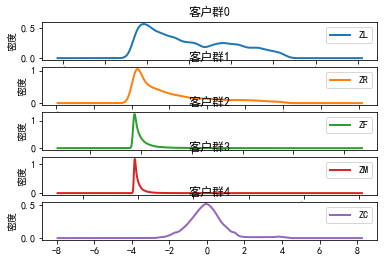

<module 'matplotlib.pyplot' from 'E:\\programSoftware\\Anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [41]:
density_plot(data)

## 画出5个聚类中心点在每个维度上的散点图，并按统一类别把聚类中心用线连接起来

In [3]:
plt.plot(x1,y1,label='sin(x)',color='b')

NameError: name 'x1' is not defined

Text(0.5, 0, 'ZL--ZR--ZF--ZM--ZC')

Text(0, 0.5, 'values')

<Figure size 432x540 with 0 Axes>

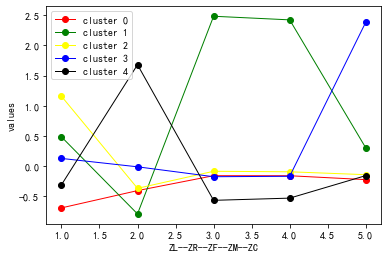

<Figure size 432x540 with 0 Axes>

In [64]:
clu = model.cluster_centers_  
x = [1,2,3,4,5]  
colors = ['red','green','yellow','blue','black']  
for i in range(5):  
   plt.plot(x,clu[i],label='cluster '+str(i),linewidth=1,color=colors[i],marker='o')   
plt.legend()
plt.xlabel('ZL--ZR--ZF--ZM--ZC')  
plt.ylabel('values')  
plt.figure(figsize=(6, 7.5))
plt.show() 

## 分析聚类结果

我们重点关注的是ZL，ZF，ZM，从图中可以看到：
1、客户群4[blue] 的zF,zM很高，zL也不低，可以看做是重要保持的客户；
2、客户群3[yellow] 重要发展客户
3、客户群1[red] 重要挽留客户，原因：入会时间长，但是zF,zM较低
4、客户群2[green] 一般客户
5、客户群5[black] 低价值客户

重要保持客户：zR（最近乘坐航班）低，zF（乘坐次数）、zC（平均折扣率高，舱位较高）、zM（里程数）高。最优先的目标，进行差异化管理，提高满意度。
重要发展客户：zR低，zC高，zF或zM较低，潜在价值客户。虽然说，当前价值不高，但是却有很大的发展潜力，促使这类客户在本公司消费和合作伙伴处消费。
重要挽留客户：zC、zF、zM较高，但是较长时间没有乘坐（zR）小。增加与这类客户的互动，了解情况，采取一定手段，延长客户生命周期。
一般与低价值客户：zC、zF、zM、zL低，zR高。他们可能是在公司打折促销时才会乘坐本公司航班。

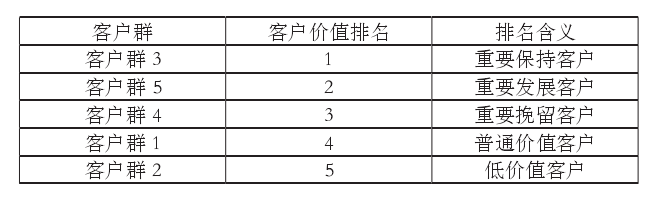

# 实验四 使用神经网络识别手写体数字

使用sklearn.neural_network.MLPClassifier类实现手写数字图片识别。
MLP的常用的几个参数一般为
    activation（选择激活函数，如relu，sigmod等，计算效率不一样），
    solver（权重优化算法，adam，sgd，lbfgs等，小数据集一般选用lbfgs效果更佳，收敛速度也更快。）
    alpha（正则化项参数），
    hidden_layer_sizes（隐藏层参数，（200,100,50）即为三层，每层神经元个数为200、100、50）  
    batch_size：随机优化的minibatches的大小；
    learning_rate：学习率，constant、invscaling、adaptive；
    learning_rate_init：初始学习率。只有当solver为sgd或adam时才使用；
    power_t：逆扩展学习率的指数，只有当solver为sgd时才使用；
    max_iter：最大迭代次数，具体用法可以直接查文档。

In [73]:
from sklearn.neural_network import MLPClassifier
import joblib
import numpy as np
from sklearn.metrics import accuracy_score

## 载入训练数据

In [84]:
data_train = np.loadtxt(r"data/digits_training.csv",skiprows=1, delimiter=',')

### 查看前五行数据

In [85]:
data_train[:4,:]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]])

### 查看数据集大小

In [86]:
data_train.shape[0]

5000

## 标准化训练数据

In [87]:
xTrain = data_train[:, 1:]
yTrain = data_train[:, 0]

In [79]:
def normalizeData(X): 
    return (X - X.mean())/X.max()

In [88]:
xTrain=normalizeData(xTrain)

## 构建多层感知机，训练模型

In [89]:
model = MLPClassifier(activation='relu',
                      solver= "lbfgs" ,
                      alpha=1e-6, 
                      hidden_layer_sizes=(200, 100, 50))

In [90]:
model.fit(xTrain,yTrain)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(200, 100, 50), solver='lbfgs')

## 保存训练模型为mlp_classifier_model1.m

In [83]:
joblib.dump(model, "output/mlp_classifier_model1.m")

['output/mlp_classifier_model1.m']

## 载入测试数据

In [91]:
data_test = np.loadtxt(r"data/digits_testing.csv",skiprows=1, delimiter=',')

### 查看前5行

In [36]:
data_test[:5,:]

array([[8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

### 查看数据集大小

In [93]:
data_test.shape[0]

500

## 标准化测试数据

In [94]:
xTest= data_test[:, 1:]
yTest = data_test[:, 0]

In [95]:
xTest=normalizeData(xTest)

## 使用模型对测试集进行预测

### 载入模型

In [96]:
model2=joblib.load("output/mlp_classifier_model1.m")

### 预测模型

In [97]:
pred=model2.predict(xTest)

### 打印错误数据

In [101]:
print("error data:",(pred != yTest).sum())

error data: 29


### 评价模型

In [100]:
print("accuracy_predict;",accuracy_score(yTest,pred))

accuracy_predict; 0.942


# 实验五 对PCA降维后的手写体数字图片数据分类

In [1]:
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from timeit import default_timer as timer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import joblib
import numpy as np

## 载入训练数据

In [2]:
data_train = np.loadtxt(r"data/digits_training.csv",skiprows=1,delimiter=',')

### 查看前5行

In [3]:
data_train[:4,:]

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [4., 0., 0., ..., 0., 0., 0.]])

### 查看数据集大小

In [4]:
data_train.shape[0]

5000

## 标准化训练数据

In [5]:
xTrain = data_train[:, 1:]
yTrain = data_train[:, 0]

In [6]:
def normalizeData(X): 
    return X - np.mean(X, axis=0)

In [7]:
xTrain=normalizeData(xTrain)

## 主成分分析

PCA降维即主成分分析，概括来说就是选择包含信息量大的维度，去除信息量少的"干扰"维度。
原理：
    1.数据从原来的坐标系转换到新的坐标系，新坐标系的选择是由数据本身决定的。第一个新坐标轴选择的是原始数据中方差最大的方向(即数据差异性最大的方向)，第二个新坐标轴选择与第一个新坐标轴正交且具有最大方差的方向，以此类推，共建立与原始数据特征数目相等的新坐标轴。
    2.大部分方差都包含在最前面的几个新坐标轴中，因此我们可以忽略余下的坐标轴，从而实现降维。
我们先来画一个图确认方差解释程度，利用matplotlib库画图

In [8]:
pca = PCA(n_components=xTrain.shape[1])
pca.fit(xTrain)

PCA(n_components=784)

表示取前n个主成分能解释多少百分比的方差

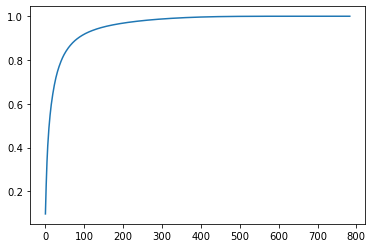

In [9]:
plt.plot([i for i in range(xTrain.shape[1])],[np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(xTrain.shape[1])])
plt.show()

对于方差解释度既要顾忌准确程度，也要顾忌效率
大约在150左右的维度能达到95%以上（其实准确计算后发现149时达到95%）

## 使用PCA对数据降维，显示主成分个数

In [10]:
pca = PCA(n_components=0.95)
pca.fit(xTrain)

PCA(n_components=0.95)

In [12]:
xTrain_re = pca.transform(xTrain)

In [13]:
xTrain_re.shape[1]

149

## 使用多层感知机对PCA降维后的数据训练分类模型

In [14]:
model = MLPClassifier(activation='relu',solver= "lbfgs" ,alpha=1e-6, hidden_layer_sizes=(200, 100, 50))
model.fit(xTrain_re,yTrain)

MLPClassifier(alpha=1e-06, hidden_layer_sizes=(200, 100, 50), solver='lbfgs')

## 保存分类模型为mlpNN_pca.m

In [15]:
joblib.dump(model, "output/mlpNN_pca.m")

['output/mlpNN_pca.m']

## 载入测试数据

In [16]:
data_test = np.loadtxt(r"data/digits_testing.csv",skiprows=1, delimiter=',')

### 查看前5行

In [17]:
data_test[:5,:]

array([[8., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.],
       [2., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

### 查看数据集大小

In [18]:
data_test.shape[0]

500

## 标准化测试数据

In [19]:
xTest = data_test[:, 1:]
yTest = data_test[:, 0]

In [20]:
xTest = normalizeData(xTest)
xTest_re = pca.transform(xTest)

## 使用模型对测试集进行预测

### 载入模型

In [21]:
model2 = joblib.load("output/mlpNN_pca.m")

### 预测模型

In [22]:
pred = model2.predict(xTest_re)

### 打印错误数据

In [23]:
print("error data:",(pred != yTest).sum())

error data: 45


### 评价模型

In [24]:
print("accuracy_predict;",accuracy_score(yTest,pred))

accuracy_predict; 0.91


# 实验六 使用朴素贝叶斯对垃圾邮件分类

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from  sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 读取CSV文件

In [84]:
sms = pd.read_csv("data/messages.csv")

In [85]:
sms.head()

,Subject,Spam
0,Re: New Sequences Window,0
1,[zzzzteana] RE: Alexander,0
2,[zzzzteana] Moscow bomber,0
3,[IRR] Klez: The Virus That Won't Die,0
4,Re: Insert signature,0


## 数据预处理

In [86]:
sms_data = sms.iloc[:,0]
sms_label = sms.iloc[:,1]

In [87]:
# 把无意义的符号都替换成空格
sms_data_clear = []
for line in sms_data:
    # 每一行都去掉无意义符号并按空格分词
    for char in line:
        if char.isalpha() is False:
            # 不是字母，发生替换操作:
            newString = line.replace(char," ")
    tempList = newString.split(" ")
    # 将处理好后的一行数据追加到存放干净数据的列表
    sms_data_clear.append(tempList)
# 去掉长度不大于3的词和没有语义的词
sms_data_clear2 = []
for line in sms_data_clear:
    tempList = []
    for word in line:
        if word != '' and len(word) > 3 and word.isalpha():
            tempList.append(word)
    tempString = ' '.join(tempList)
    sms_data_clear2.append(tempString)
sms_data_clear = sms_data_clear2

## 将数据集按3:1的比例拆分成训练集合测试集

In [88]:
x_train,x_test,y_train,y_test = train_test_split(sms_data_clear,sms_label,test_size=0.25,random_state=0,stratify=sms_label)

## 词向量化

In [89]:
tfidf = TfidfVectorizer() # 词向量化
X_train = tfidf.fit_transform(x_train)
X_test = tfidf.transform(x_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

## 根据训练数据生成特征矩阵和分类矩阵，显示训练矩阵特征维度

In [90]:
X_train.shape

(2451, 2713)

## 根据测试数据生成特征矩阵和分类矩阵，显示测试矩阵特征维度

In [91]:
X_test.shape

(817, 2713)

## 用训练集训练朴素贝叶斯模型

In [93]:
gnb = GaussianNB()
module = gnb.fit(X_train,y_train)

## 用测试集进行预测

In [94]:
y_predict = module.predict(X_test)

## 输出模型分类的各个指标:准确率、召回率、精度、和F1值

In [95]:
# 利用classification_report方法来细致评价模型
cr = classification_report(y_predict,y_test)

In [96]:
print(cr)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       594
           1       0.79      0.39      0.53       223

    accuracy                           0.81       817
   macro avg       0.80      0.68      0.70       817
weighted avg       0.80      0.81      0.78       817



In [ ]:
宏平均 macro avg:对每个类别的 精准、召回和F1 加和求平均
加权平均 weighted avg：是对宏平均的一种改进，考虑了每个类别样本数量在总样本中占比

# 实验七 使用SVM对手写体数字图片分类

In [4]:
import pandas as pd
from sklearn import svm
import joblib

## 载入训练数据、分出特征属性和类别，对特征属性标准化，显示读入数据的行数

### 载入训练数据

In [5]:
train_data = pd.read_csv ('data/digits_training.csv')

In [6]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 分出特征属性和类别

In [ ]:
# 分类属性
yTrain = train_data.values[:,0]
# 特征属性
xTrain = train_data.values[:,1:]

### 对特征属性标准化

In [7]:
# 标准化函数
def normalization(X):
    return (X-X.mean())/X.max()

In [9]:
xTrain.shape

(5000, 784)

In [10]:
# 对特征属性进行标准化处理
xTrain = normalization(xTrain)

### 训练数据条数

In [12]:
xTrain.shape[0]

5000

## 构建多分类SVM模型

'''
默认核函数是 ‘rbf’-->就是radial basis function keranl (径向基核函数)
模型准确率约为0.89
使用线性核函数（linear）构建模型，准确率在0.908左右
线性核函数主要用于线性可分的情况
在特征数量相对于样本数量非常多的时候，适合采用线性核函数
'''

In [13]:
model = svm.SVC(decision_function_shape='ovo',kernel='linear')

## 训练模型

In [14]:
model.fit(xTrain,yTrain)

SVC(decision_function_shape='ovo', kernel='linear')

## 保存模型

In [15]:
joblib.dump(model,"output/svm_classifier_model1.m")

['output/svm_classifier_model1.m']

## 载入测试数据，分出特征属性和类别，对特征属性标准化，显示读入数据的行数

In [16]:
test_data = pd.read_csv("data/digits_testing.csv")
yTest = test_data.values[:,0]
xTest = test_data.values[:,1:]
print("测试数据：",xTest.shape[0],"条")
xTest = normalization(xTest)

测试数据： 500 条


## 使用模型对测试集进行预测，显示预测错误数据的数目、预测数据的准确率和模型内建正确率

In [17]:
model = joblib.load("output/svm_classifier_model1.m")
result =model.predict(xTest)
print("预测错误数据：",(result!=yTest).sum())
print("测试数据正确率：",(result==yTest).sum()/len(yTest))
print("模型内构建正确率估计：",model.score(xTest,yTest))

预测错误数据： 48
测试数据正确率： 0.904
模型内构建正确率估计： 0.904
